In [1]:
#import libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from tensorflow.keras import layers, callbacks
from tensorflow import keras

In [2]:
#read csv file
df = pd.read_csv("hotel_bookings.csv")

In [3]:
#Check dataset
print("Shape:",df.shape)
print("Number of duplicated rows:",df.duplicated().sum())
print("Number of Null value:\n",df.isnull().sum())

Shape: (119390, 32)
Number of duplicated rows: 31994
Number of Null value:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type          

In [4]:
#drop duplicated rows
df=df.drop_duplicates()

In [5]:
#fill agent and company columns wiht 0
fill= {"agent": 0, "company": 0}
df= df.fillna(fill)

#drop children and country columns
df.drop('children',axis=1, inplace=True)
df.drop('country',axis=1, inplace=True)

In [6]:
#descriptive statistics
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
#summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  babies                          87396 non-null  int64  
 11  meal                            87396 non-null  object 
 12  market_segment                  8739

In [ ]:
q1= df['adr'].quantile(0.25)
q3= df['adr'].quantile(0.75)
IQR=q3-q1

IQR

lower=q1-1.5*IQR
upper=q3+1.5*IQR

df= df[(df['adr'] >= lower) & (df['adr'] <= upper)]

In [9]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])

In [10]:
# apply Label encoder to df_categorical
enc= LabelEncoder()
df_categorical = df_categorical.apply(enc.fit_transform)
df.drop(df_categorical.columns, axis=1, inplace=True)
df = pd.concat([df, df_categorical], axis=1)

In [11]:
feature=['lead_time', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests',
       'market_segment', 'distribution_channel','deposit_type']

In [12]:
#drop unnecessary columns with droping reservation_status
drop_cols=[
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'agent',
 'company',
 'reservation_status',
 'is_canceled']

In [13]:
# Define features and target variable
X=df.drop(drop_cols,axis=1)
y=df['is_canceled']

In [14]:
# Split data into training and testing sets (70% train, 30% test)
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=.3, random_state=42)

In [15]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# build network model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

c:\Users\رناد\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [18]:
# apply early stopping 
early_stop = callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [19]:
# train the model 
history = model.fit(
    X_train_scaled, y_train,
    validation_split=.2,
    batch_size=512,
    epochs=100,
    callbacks=[early_stop],
)

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - binary_accuracy: 0.6764 - loss: 0.6531 - val_binary_accuracy: 0.7408 - val_loss: 0.5113
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.7853 - loss: 0.4685 - val_binary_accuracy: 0.7589 - val_loss: 0.4742
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.7977 - loss: 0.4454 - val_binary_accuracy: 0.7861 - val_loss: 0.4404
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8095 - loss: 0.4269 - val_binary_accuracy: 0.8182 - val_loss: 0.4116
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8059 - loss: 0.4293 - val_binary_accuracy: 0.8246 - val_loss: 0.4082
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8133 - loss: 0.4157 - val_binary_accuracy: 0.8263 - val_loss: 0.3936
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.8181 - loss: 0.4096 - val_binary_accuracy: 0.8290 - val_loss: 0.3916
Epoch 8/100
9

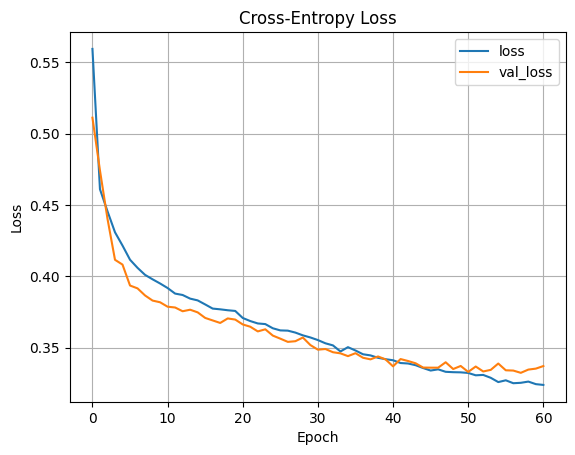

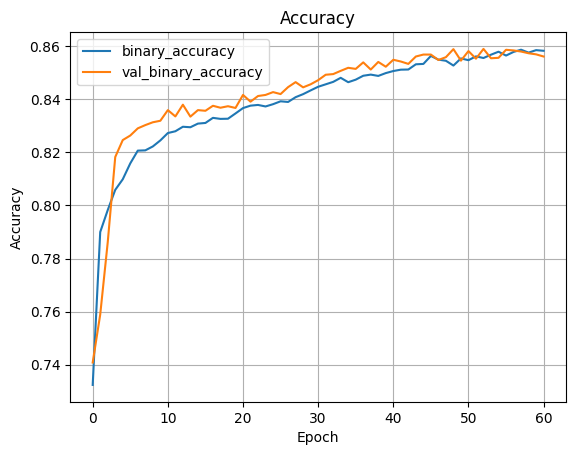

In [20]:
#compare the model loss against the actual val_loss
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(title="Cross-Entropy Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

#compare the model accuracy against the actual val accuracy
history_df[['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

820/820 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step


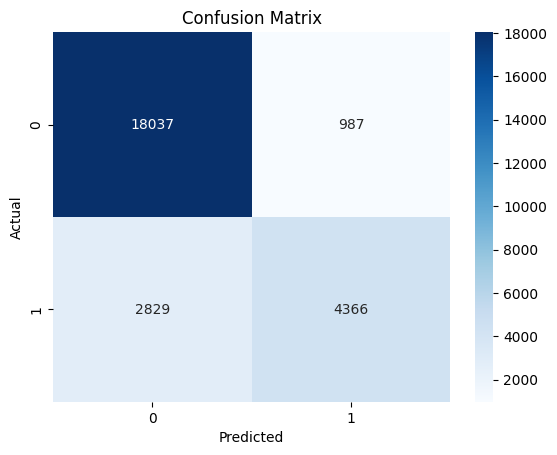

In [21]:
# confusion matrix
y_pred = model.predict(X_test_scaled)
y_pred_labels = (y_pred > 0.5).astype(int)

cm = metrics.confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
# Calculate performance metrics
acc = metrics.accuracy_score(y_test, y_pred_labels)
prec = metrics.precision_score(y_test, y_pred_labels)
rec = metrics.recall_score(y_test, y_pred_labels)
f1 = metrics.f1_score(y_test, y_pred_labels)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8545
Precision: 0.8156
Recall: 0.6068
F1 Score: 0.6959


In [23]:
# test evaluate
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

820/820 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.8555 - loss: 0.3362
Test Accuracy: 0.8545, Test Loss: 0.3389


In [24]:
# Accuracy: 0.8598
# Precision: 0.8292
# Recall: 0.6035
# F1 Score: 0.6986
# Test Accuracy: 0.8598, Test Loss: 0.3325

# Accuracy: 0.8620
# Precision: 0.8367
# Recall: 0.6053
# F1 Score: 0.7024
# Test Accuracy: 0.8620, Test Loss: 0.3293

# Accuracy: 0.8602
# Precision: 0.8317
# Recall: 0.6026
# F1 Score: 0.6989
# Test Accuracy: 0.8602, Test Loss: 0.3337

# Accuracy: 0.8605
# Precision: 0.8285
# Recall: 0.6073
# F1 Score: 0.7008
# Test Accuracy: 0.8605, Test Loss: 0.3303

In [25]:
# model = keras.Sequential([
#     layers.Dense(128, activation='relu',input_shape=(X_train.shape[1],)),
#     layers.Dropout(.1),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

# Accuracy: 0.8309
# Precision: 0.7577
# Recall: 0.5641
# F1 Score: 0.6467

In [26]:
# ✅ Accuracy: 0.8551
# ✅ Precision: 0.8300
# ✅ Recall: 0.5936
# ✅ F1 Score: 0.6922